## Ways to handle missing values  (continues variables)
    

* **Delete Rows/Columns**
* **Statistical Methods**
    * Mean
        * we can use mean to handle missing values when particular column is normally distributed
    * Median
    * Mode
        * we can use median/mode if we have outliers in that partilcar data column (Generally we don't consider outliars)   
* **Predicting The Missing Values**

In [1]:
import pandas as pd
from sklearn import linear_model

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
df = pd.read_excel('salary.xlsx')

In [3]:
df

,experience,test_score,interview_score,hr_score,salary
0,NaN,8.0,9.0,NaN,65000
1,NaN,8.0,6.0,NaN,45000
2,5.0,6.0,7.0,NaN,60000
3,2.0,10.0,10.0,NaN,65000
4,7.0,9.0,6.0,NaN,70000
5,3.0,7.0,NaN,NaN,62000
6,10.0,NaN,7.0,NaN,72000
7,11.0,7.0,8.0,8.0,80000


In [4]:
df.isnull()

,experience,test_score,interview_score,hr_score,salary
0,True,False,False,True,False
1,True,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,True,True,False
6,False,True,False,True,False
7,False,False,False,False,False


In [5]:
df.isnull().sum()

experience         2
test_score         1
interview_score    1
hr_score           7
salary             0
dtype: int64

In [6]:
import missingno as mno

<AxesSubplot:>

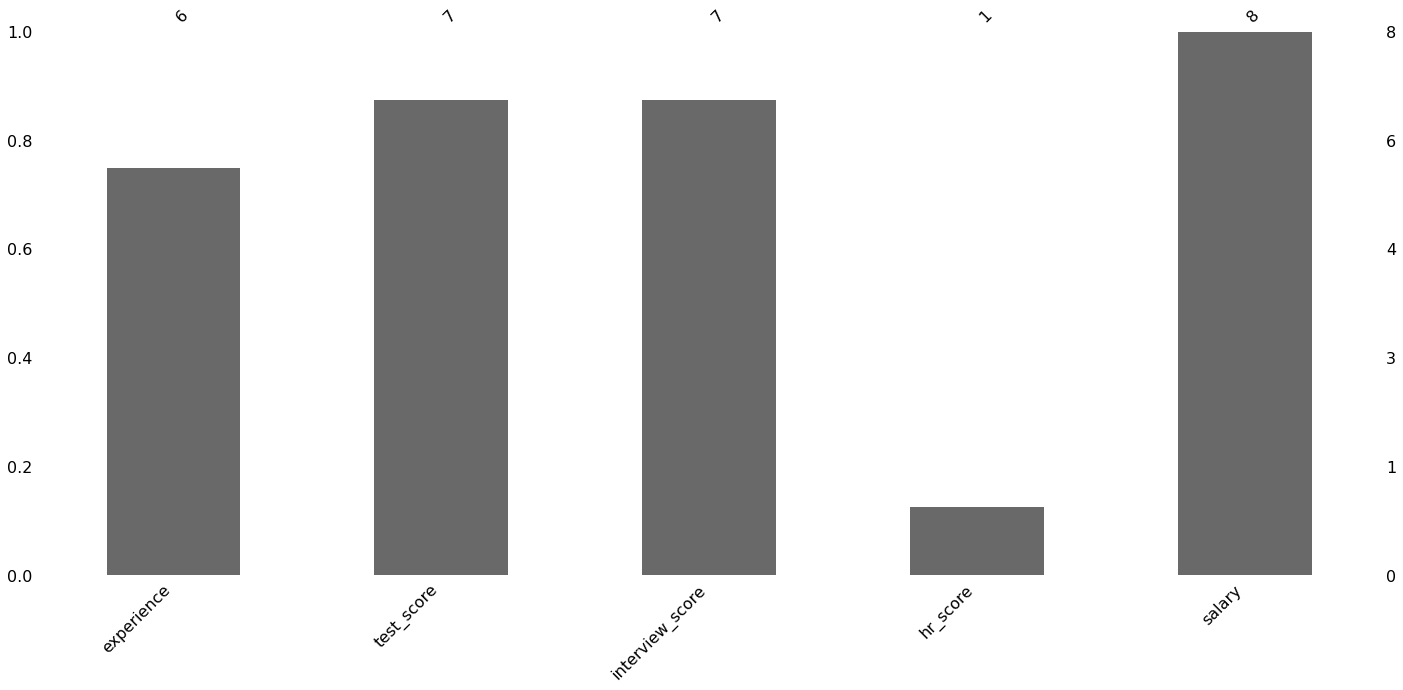

In [7]:
mno.bar(df)

In [8]:
import seaborn as sb

<AxesSubplot:>

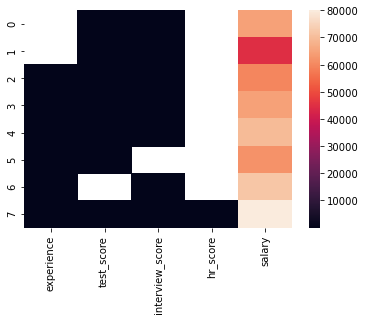

In [9]:
sb.heatmap(df)

In [10]:
df

,experience,test_score,interview_score,hr_score,salary
0,NaN,8.0,9.0,NaN,65000
1,NaN,8.0,6.0,NaN,45000
2,5.0,6.0,7.0,NaN,60000
3,2.0,10.0,10.0,NaN,65000
4,7.0,9.0,6.0,NaN,70000
5,3.0,7.0,NaN,NaN,62000
6,10.0,NaN,7.0,NaN,72000
7,11.0,7.0,8.0,8.0,80000


In [11]:
df.dropna()

,experience,test_score,interview_score,hr_score,salary
7,11.0,7.0,8.0,8.0,80000


In [12]:
df.drop(['hr_score'],axis=1,inplace=True)

In [13]:
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9.0,65000
1,NaN,8.0,6.0,45000
2,5.0,6.0,7.0,60000
3,2.0,10.0,10.0,65000
4,7.0,9.0,6.0,70000
5,3.0,7.0,NaN,62000
6,10.0,NaN,7.0,72000
7,11.0,7.0,8.0,80000


In [14]:
smdf = df.copy()

In [15]:
smdf

,experience,test_score,interview_score,salary
0,NaN,8.0,9.0,65000
1,NaN,8.0,6.0,45000
2,5.0,6.0,7.0,60000
3,2.0,10.0,10.0,65000
4,7.0,9.0,6.0,70000
5,3.0,7.0,NaN,62000
6,10.0,NaN,7.0,72000
7,11.0,7.0,8.0,80000


In [16]:
smdf.fillna(smdf.mean(),inplace=True)

In [17]:
smdf

,experience,test_score,interview_score,salary
0,6.333333,8.000000,9.000000,65000
1,6.333333,8.000000,6.000000,45000
2,5.000000,6.000000,7.000000,60000
3,2.000000,10.000000,10.000000,65000
4,7.000000,9.000000,6.000000,70000
5,3.000000,7.000000,7.571429,62000
6,10.000000,7.857143,7.000000,72000
7,11.000000,7.000000,8.000000,80000


In [18]:
lr = linear_model.LinearRegression()
lr.fit(smdf[['experience','test_score','interview_score']],smdf.salary)

LinearRegression()

In [20]:
lr.predict([[7,6,6]])

array([59796.63976353])

In [21]:
lr.predict([[12,9,9]])

array([84279.20010926])

In [23]:
smdf.to_csv('smdf.csv',index=False)

In [24]:
pdf =  pd.read_csv('smdf.csv')

In [25]:
pdf

,experience,test_score,interview_score,salary
0,NaN,8.000000,9.000000,65000
1,NaN,8.000000,6.000000,45000
2,5.0,6.000000,7.000000,60000
3,2.0,10.000000,10.000000,65000
4,7.0,9.000000,6.000000,70000
5,3.0,7.000000,7.571429,62000
6,10.0,7.857143,7.000000,72000
7,11.0,7.000000,8.000000,80000


In [27]:
is_nan = pdf.isnull()
row_has_nan = is_nan.any(axis=1)
rows_with_nan = pdf[row_has_nan]

In [28]:
rows_with_nan

,experience,test_score,interview_score,salary
0,NaN,8.0,9.0,65000
1,NaN,8.0,6.0,45000


In [29]:
tdf = pdf.dropna()

In [30]:
tdf

,experience,test_score,interview_score,salary
2,5.0,6.000000,7.000000,60000
3,2.0,10.000000,10.000000,65000
4,7.0,9.000000,6.000000,70000
5,3.0,7.000000,7.571429,62000
6,10.0,7.857143,7.000000,72000
7,11.0,7.000000,8.000000,80000


In [31]:
slr = linear_model.LinearRegression()
slr.fit(tdf[['test_score','interview_score']],tdf.experience)

LinearRegression()

In [33]:
slr.predict([[7,6]])

array([8.24916206])

In [34]:
slr.predict(rows_with_nan[['test_score','interview_score']])

array([4.78144024, 7.99038898])

In [35]:
ldf = pd.read_csv('smdf.csv')

In [36]:
ldf

,experience,test_score,interview_score,salary
0,4.781440,8.000000,9.000000,65000
1,7.990389,8.000000,6.000000,45000
2,5.000000,6.000000,7.000000,60000
3,2.000000,10.000000,10.000000,65000
4,7.000000,9.000000,6.000000,70000
5,3.000000,7.000000,7.571429,62000
6,10.000000,7.857143,7.000000,72000
7,11.000000,7.000000,8.000000,80000


In [37]:
lr = linear_model.LinearRegression()
lr.fit(ldf[['experience','test_score','interview_score']],ldf.salary)

LinearRegression()

In [38]:
lr.predict([[7,6,6]])

array([59346.85421183])

In [39]:
lr.predict([[12,9,9]])

array([83205.84124717])